<a href="https://colab.research.google.com/github/rimanoble04/DS-tutorial/blob/main/tutorial-6/SVM_nolib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
# Load iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only first 2 features for 2D plotting
y = iris.target

# Convert to binary classification: Setosa vs Not-Setosa
y = np.where(y == 0, 1, -1)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameters
lr = 0.001
C = 0.01
epochs = 1000


In [8]:
# Initialize weights and bias
w = np.zeros(X_train.shape[1])
b = 0

# Train SVM
for epoch in range(epochs):
    for i in range(len(X_train)):
        if y_train[i] * (np.dot(X_train[i], w) + b) >= 1:
            w -= lr * (2 * C * w)
        else:
            w -= lr * (2 * C * w - y_train[i] * X_train[i])
            b -= lr * y_train[i]

# Predict
def predict(X):
    return np.sign(np.dot(X, w) + b)

y_pred = predict(X_test)
acc = np.mean(y_pred == y_test)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.33


In [9]:
# Training loop using gradient descent
for epoch in range(epochs):
    for i in range(len(X_train)):
        condition = y_train[i] * (np.dot(X_train[i], w) + b) >= 1
        if condition:
            w -= lr * (2 * C * w)
        else:
            w -= lr * (2 * C * w - np.dot(X_train[i], y_train[i]))
            b -= lr * y_train[i]

# Prediction function
def predict(X):
    return np.sign(np.dot(X, w) + b)

# Evaluate on test data
y_pred = predict(X_test)
accuracy = np.mean(y_pred == y_test)

print("Weights:", w)
print("Bias:", b)
print("Accuracy:", accuracy)

Weights: [-15.03842527  14.54375492]
Bias: 159.60700000039805
Accuracy: 0.3333333333333333


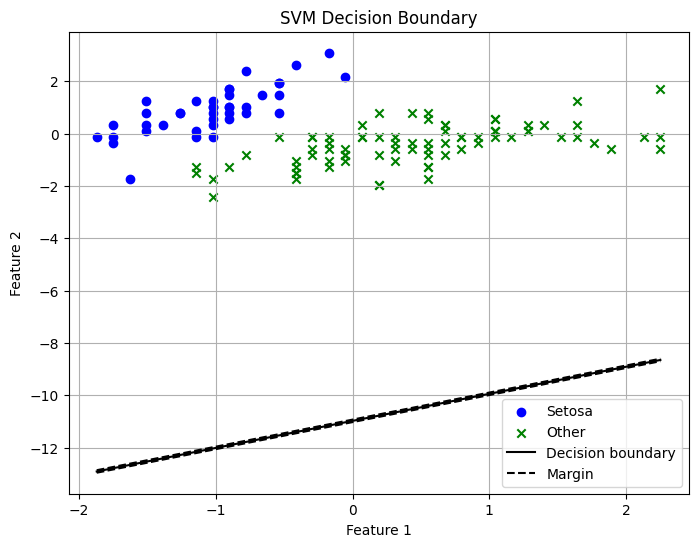

In [11]:
def plot_decision_boundary(X, y, w, b):
    plt.figure(figsize=(8, 6))

    for label, marker, color in zip([1, -1], ('o', 'x'), ('blue', 'green')):
        plt.scatter(X[y == label][:, 0], X[y == label][:, 1], marker=marker, color=color,
                    label="Setosa" if label == 1 else "Other")

    x0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x1 = -(w[0] * x0 + b) / w[1]

    margin = 1 / np.linalg.norm(w)
    x1_margin_up = x1 + margin
    x1_margin_down = x1 - margin

    plt.plot(x0, x1, "k-", label="Decision boundary")
    plt.plot(x0, x1_margin_up, "k--", label="Margin")
    plt.plot(x0, x1_margin_down, "k--")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM Decision Boundary")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(X_train, y_train, w, b)
